<a href="https://colab.research.google.com/github/jihanurulk/NaiveBayes.NeuralNetwork.K-NearestNeighbors/blob/main/NN_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [67]:
#Pemanggilan data
data = pd.read_csv("transfusion.csv", sep=';')

In [68]:
#Menampilkan 5 data teratas
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


Setiap baris dalam dataset mewakili satu pasien, dan kolom-kolomnya adalah atribut-atribut yang diamati pada pasien-pasien tersebut. Berikut adalah penjelasan dari setiap variabelnya:
1. Recency (months): berapa lama sejak donor darah terakhir dalam bulan
2. Frequency (times): jumlah total donor darah yang telah dilakukan pasien
3. Monetary (c.c. blood): darah yang didonorkan oleh pasien dalam cc
4. Time (months): berapa lama sejak donor darah pertama dalam bulan
5. whether he/she donated blood in March 2007: 1 berarti mendonorkan darah; 0 berarti tidak mendonorkan darah

Dataset ini memberikan informasi penting tentang karakteristik pasien yang dapat digunakan untuk memprediksi atau menganalisis terkait boleh atau tidaknya pasien mendonorkan darah.

In [69]:
#Menampilkan 5 data terakhir
data.tail(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


Dataset ini memiliki total pengamatan 747 pasien.

In [70]:
#Melihat statistika deskriptif dari data
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [71]:
#Mengganti nama kolom 'whether he/she donated blood in March 2007' menjadi 'Target'
data.rename(columns={'whether he/she donated blood in March 2007': 'Target'}, inplace=True)

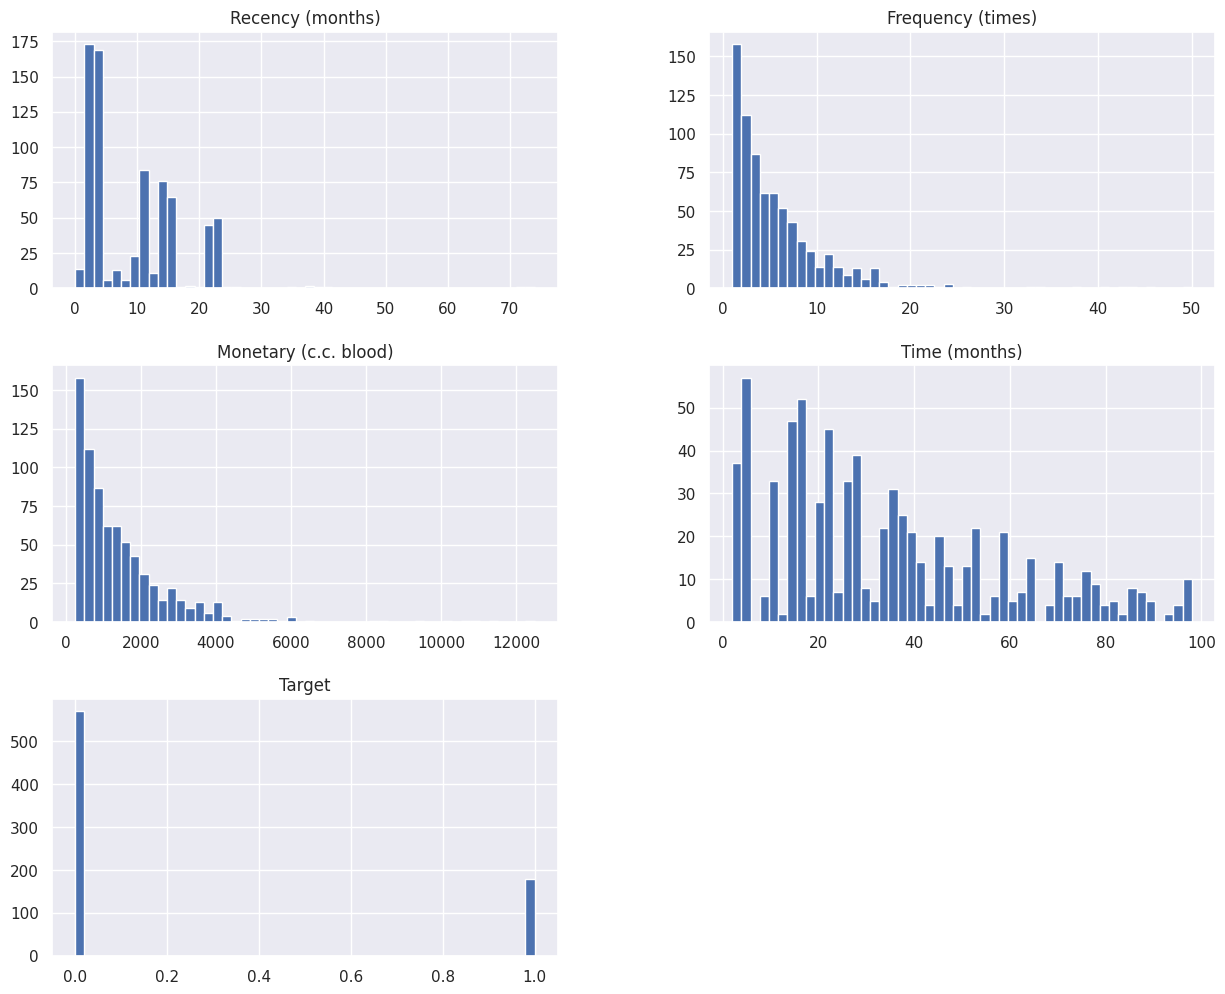

In [72]:
# Histograms
data.hist(bins=50, figsize=(15,12));

Dari histogram di atas, dapat dilihat bahwa lebih banyak pasien yang dapat mendonorkan darahnya.

In [73]:
#Menampilkan informasi tipe data setiap kolom dan mengecek missing value dari masing-masing kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   Target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut memiliki 5 kolom, dengan jumlah maksimal baris untuk setiap kolomnya yaitu sebanyak 748 baris.
Semua data berbentuk (type data) int64.

In [74]:
#Mengetahui jumlah missing value di setiap kolom data
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Recency (months),0
Frequency (times),0
Monetary (c.c. blood),0
Time (months),0
Target,0


Berdasarkan output summarize di atas, diperoleh bahwa tidak ada kolom yang terdapat missing value (blanks/ N/A (Python : nan atau NaN)). Sehingga, tidak perlu untuk diidentifikasi lebih lanjut.

Cek Outlier dapat dideteksi menggunakan beberapa metode:

Boxplot → Visualisasi distribusi dan outlier

Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

1. Boxplot

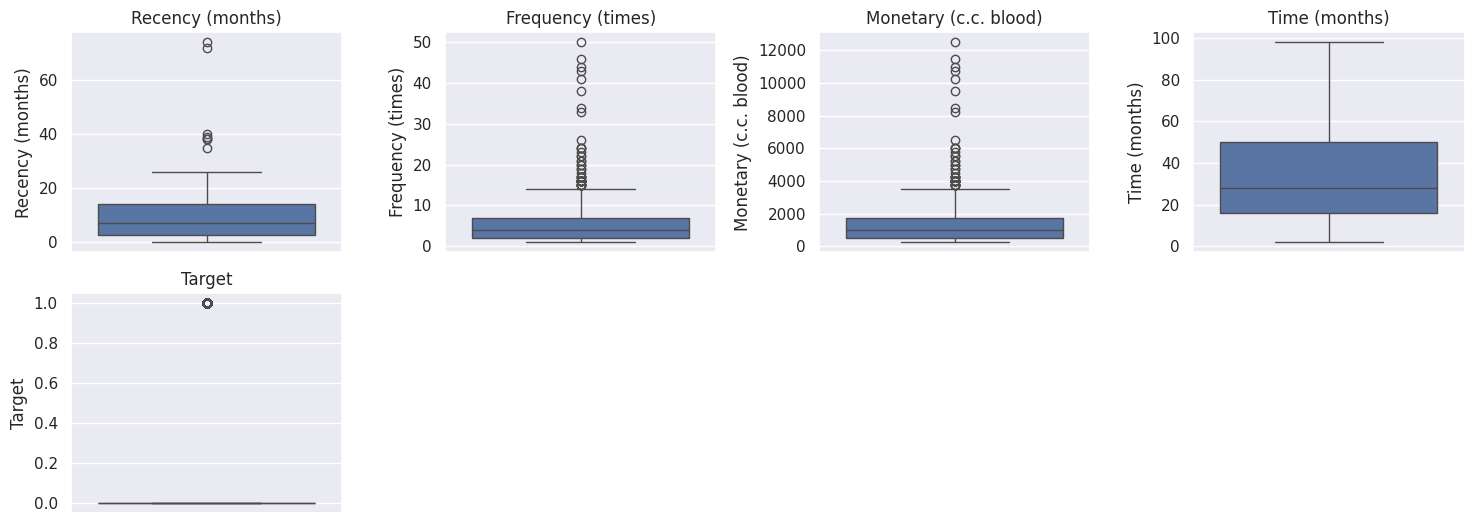

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Recency (months)','Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'Target']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Recency (months): 7 outliers
Frequency (times): 45 outliers
Monetary (c.c. blood): 45 outliers
Time (months): 0 outliers
Target: 178 outliers


Berdasarkan IQR, terdapat 7 outliers pada kolom Recency (months), 45 outliers pada kolom Frequency (times) dan kolom Monetary (c.c. blood), serta 178 outliers pada kolom whether he/she donated blood in March 2007.

Outlier dapat memiliki dampak yang signifikan terhadap data analisis dan juga hasilnya. Berikut adalah beberapa dampak utama dari adanya outlier.
1. Pengaruh pada statistik deskriptif
   Outlier dapat mempengaruhi statistik deskriptif seperti mean, varians, dan deviasi standar. Misalnya, mean bisa menjadi sangat terdistorsi oleh beberapa outlier yang sangat tinggi atau rendah.
2. Pengaruh pada model statistik
   Pada regresi atau model statistik lainnya, outlier dapat mempengaruhi parameter model dan menghasilkan prediksi yang kurang akurat.
3. Masalah pada kengambilan keputusan
   Jika outlier tidak ditangani dengan benar, keputusan yang diambil berdasarkan data dapat menjadi tidak valid atau menyesatkan.

Berdasarkan jumlah dan dampak outlier, ada beberapa metode yang bisa digunakan:
1.   Winsorizing, mengganti outlier dengan batas IQR
     Jika data penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil.
2.   Menghapus outlier, jika jumlahnya sedikit dan tidak signifikan)
     Jika jumlah outlier sangat sedikit dan tidak mempengaruhi distribusi data, bisa dihapus.

Oleh karena data Recency (months),Frequency (times), Monetary (c.c. blood), Time (months), dan Target itu penting, maka akan digunakan Winsorizing untuk mengganti outlier dengan batas IQR. Tidak menghapus outlier, karena dapat mempengaruhi dimensi data.

Setelah menggunakan Winosorizing, ternyata Winsorizing menyebabkan masalah yang menyebabkan nilai 1 (biner) pada kolom 'Target' hilang atau tergantikan.

Ada alternatif lain yang dapat digunakan, yaitu transformasi data. Transformasi data dapat mengurangi pengaruh outlier tanpa menghapus data, memperbaiki distribusi data agar lebih mendekati normal. Tapi transformasi data membutuhkan pemahaman tentang jenis transformasi yang tepat untuk data, dan dapat membuat interpretasi data menjadi lebih kompleks.
Sehingga dalam penanganan outlier ini menggunakan metode transformasi data.

1. Penanganan Outlier

In [77]:
from scipy import stats

# Kolom numerik yang akan ditransformasi
num_cols = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

# Terapkan transformasi Box-Cox
for col in num_cols:
  # Hitung parameter lambda optimal
  data[col], fitted_lambda = stats.boxcox(data[col] + 1)  # Tambahkan 1 untuk menghindari nilai 0
  print(f"Lambda optimal untuk {col}: {fitted_lambda}")

Lambda optimal untuk Recency (months): 0.01629847902001609
Lambda optimal untuk Frequency (times): -0.29954153870999384
Lambda optimal untuk Monetary (c.c. blood): -0.06974665845301824
Lambda optimal untuk Time (months): 0.4030158621018997


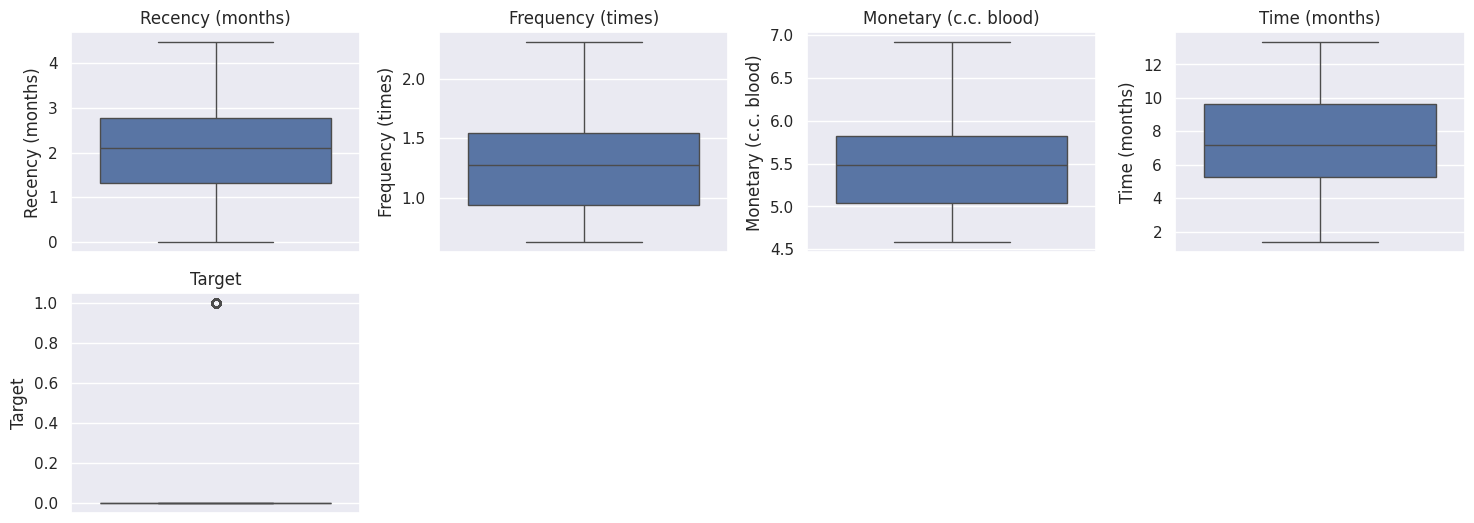

In [78]:
#Cek boxplot lagi
num_cols = ['Recency (months)','Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'Target']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [79]:
# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Recency (months): 0 outliers
Frequency (times): 0 outliers
Monetary (c.c. blood): 0 outliers
Time (months): 0 outliers
Target: 178 outliers


Setelah dilakukan penanganan outlier, data tersebut sudah tidak memiliki outlier lagi.

In [80]:
count_values = data['Target'].value_counts()
count_values

,count
Target,
0,570
1,178


In [81]:
# Menghitung rata-rata berdasarkan nilai 'Target'
mean_by_transfusion = data.groupby('Target').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Target'
print(mean_by_transfusion)

        Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
Target                                                               
0               2.235739           1.175723               5.336157   
1               1.657939           1.397487               5.630345   

        Time (months)  
Target                 
0            7.323959  
1            7.101762  


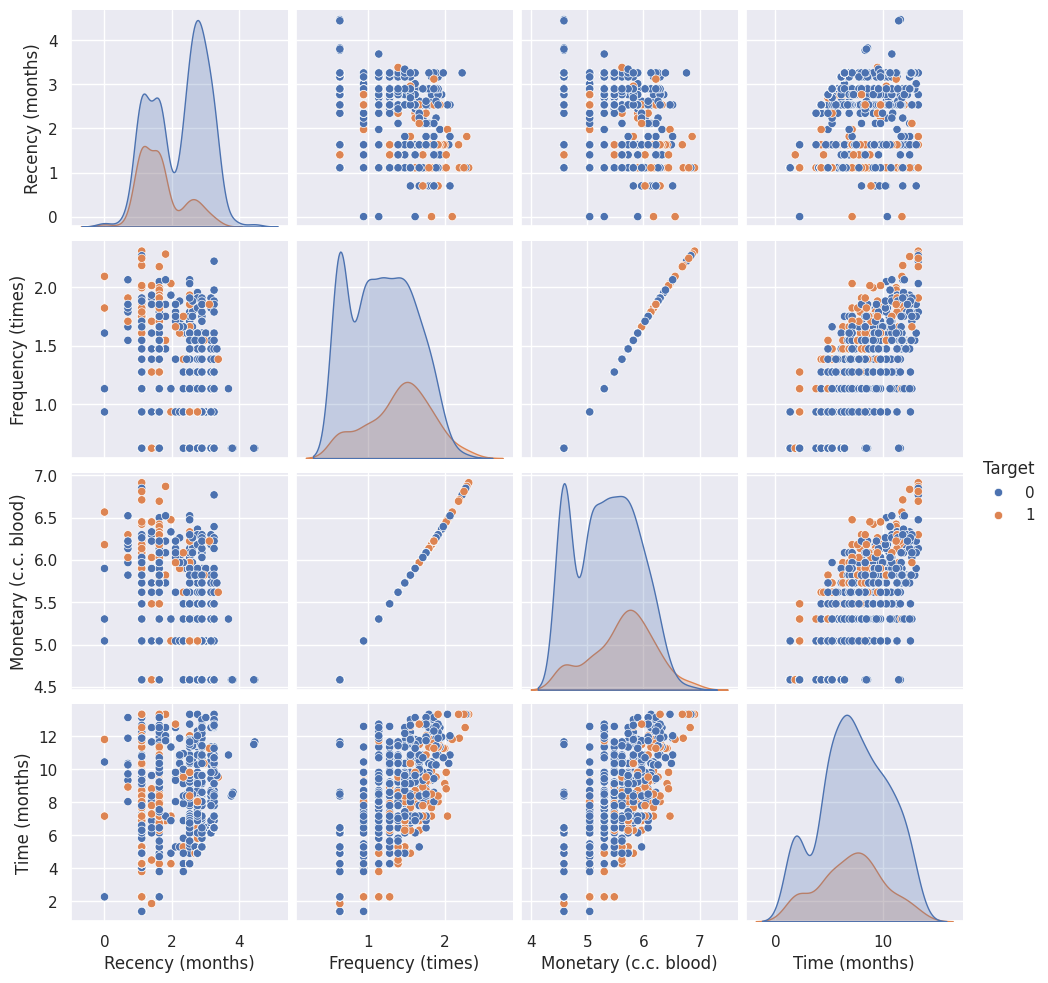

In [82]:
#Visualisasi warna dibedakan berdasarkan Target apakah boleh donor atau tidak
sns.pairplot(data, vars=['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'], hue='Target')

Kode ini menggunakan sns.pairplot dari library Seaborn untuk membuat visualisasi hubungan antara pasangan variabel dari dataset transfusion. Di sini, variabel-variabel yang dipilih untuk dianalisis adalah 'Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', dan 'Time (months)'.

**sns.pairplot** adalah fungsi dari Seaborn yang menghasilkan grid dari scatter plots (plot titik-titik) yang menunjukkan hubungan antara pasangan variabel.

**transfusion** merupakan dataset yang digunakan untuk membuat pairplot.
vars digunakan untuk menentukan variabel-variabel yang ingin dimunculkan dalam pairplot.

hue='Target': Variabel 'Target' akan digunakan untuk membedakan data.

Dalam hal ini, warna plot akan diberikan berdasarkan nilai dari kolom 'Target', yaitu apakah pasien dapat donor darah atau tidak. Dengan menggunakan pairplot dan membagi warna berdasarkan 'Target', setiap scatter plot dalam grid akan menunjukkan hubungan antara dua variabel, di mana titik-titik diberi warna yang berbeda tergantung pada apakah pasien dapat donor darah atau tidak. Ini membantu untuk melihat pola atau tren yang mungkin ada dalam hubungan antar variabel dan bagaimana pola tersebut berkaitan dengan keberadaan pasien yang donor darah pada dataset.

In [83]:
import seaborn as sns
import pandas as pd

# Menghitung korelasi antara setiap variabel dengan 'Target'
correlation_with_target = data.corr()['Target'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Target'
print(correlation_with_target)


Target                   1.000000
Frequency (times)        0.221652
Monetary (c.c. blood)    0.221252
Time (months)           -0.030685
Recency (months)        -0.301424
Name: Target, dtype: float64


Output di atas adalah nilai korelasi antara variabel 'Target' (kolom target) dengan setiap variabel lain dalam dataset. Nilai korelasi ini berkisar antara -1 hingga 1.

Korelasi Positif:
Nilai korelasi mendekati 1 menunjukkan korelasi positif yang kuat. Frequency (times) memiliki korelasi sebesar 0.221652 dengan 'Target'. Hal ini menunjukkan bahwa ada hubungan positif antara Frequency (times) dan kemungkinan sesorang dapat mendonorkan darah (Target=1).
Selanjutnya Monetary (c.c. blood) memiliki korelasi sebesar 0.221252 dengan 'Target'. Hal ini menunjukkan bahwa ada hubungan positif antara Monetary (c.c. blood) dan kemungkinan sesorang dapat mendonorkan darah (Target=1).


Korelasi Negatif:
Nilai korelasi mendekati -1 menunjukkan korelasi negatif yang kuat. Recency (months) memiliki korelasi sebesar -0.301424 dengan 'Target'. Hal ini menunjukkan bahwa ada hubungan negatif antara Recency (months) dan kemungkinan seseorang dapat mendonorkan darah (Target=1).


Korelasi Dekat dengan 0:
Nilai korelasi mendekati 0 menunjukkan korelasi yang lemah atau tidak ada korelasi yang signifikan antara variabel tersebut dengan 'Target'. Dalam kasus ini, variabel 'Time (months) memiliki nilai korelasi yang cukup rendah dengan 'Target' (kurang dari -0.1), yaitu -0.030685. Hal ini menunjukkan hubungan yang lemah dengan kemungkinan seseorang dapat mendonorkan darah.

Ringkasnya, nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'Target' (sesorang dapat mendonorkan darah atau tidak). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan boleh atau tidaknya sesorang dapat mendonorkan darah pada dataset.

# Memisahkan variabel x dan y

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (Outcome) dalam dataset.

**Data X (Fitur/Features)** merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

**Data y (Outcome/Labels)** merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

**Pemisahan ini penting karena**:
1.   Melatih Model:
Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.
2.   Validasi dan Evaluasi:
Data y (outcome) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [84]:
#memisahkan data menjadi variabel x dan Y
X = data.drop(['Target'], axis=1)
y = data['Target']

# Membagi data menjadi data training dan data testing

Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


Besarnya pembagian data:
Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan baku tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun terdapat praktik umum yang dapat dipertimbangkan:

Pemisahan Standar:
Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar:
Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar)
y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)
test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.


Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.
X_test: Data testing untuk fitur-fitur.
y_train: Data training untuk target atau label.
y_test: Data testing untuk target atau label.
Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [86]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.36694908 0.61599696 0.59463609 0.58577564]
 [0.31549616 0.4515809  0.44421266 0.26054144]
 [0.24943735 0.         0.         0.        ]
 ...
 [0.47593764 0.66884811 0.64460569 0.95013139]
 [0.31549616 0.58411312 0.5649814  0.68957736]
 [0.6524814  0.38653417 0.38549063 0.53686989]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

Pada kode yang diberikan:

MinMaxScaler().fit_transform(X_train) digunakan untuk melakukan normalisasi pada data training (X_train). MinMaxScaler().fit_transform(X_test) digunakan untuk melakukan normalisasi pada data testing (X_test). Pada intinya, MinMaxScaler melakukan normalisasi fitur-fitur dengan cara mengubah nilai setiap fitur sehingga rentang nilainya berada dalam interval yang ditentukan (biasanya antara 0 dan 1).

fit_transform() digunakan untuk melakukan dua hal sekaligus: fit(): Menghitung nilai minimum dan maksimum untuk setiap fitur di data training. transform(): Melakukan normalisasi dengan menggunakan nilai minimum dan maksimum yang sudah dihitung tadi untuk mengubah setiap fitur dalam rentang nilai yang diinginkan.

# Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [88]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [89]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.7809364548494984

In [90]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_predict['NB'])

In [92]:
# Tampilkan confusion matrix
print("Confusion Matrix (Naive Bayes):\n", cm_nb)

Confusion Matrix (Naive Bayes):
 [[97 12]
 [22 19]]


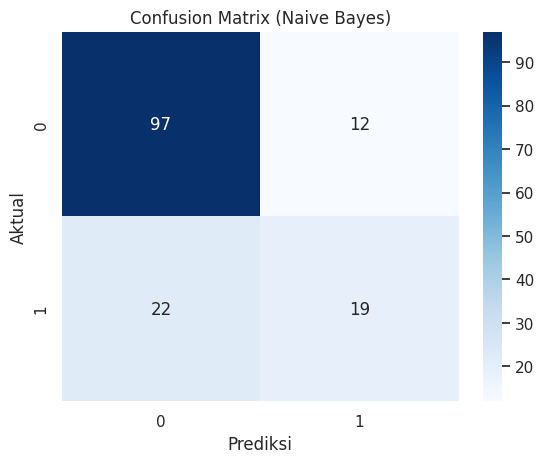

In [93]:
# Visualisasikan confusion matrix untuk Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Proses membuat model dengan Neural Network

In [94]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

Tentukan Parameter yang Ingin diuji: parameters adalah kamus yang berisi parameter-parameter yang ingin diuji. Pada contoh ini, parameter yang diuji meliputi hidden_layer_sizes (berbagai kombinasi jumlah dan ukuran hidden layers), learning_rate_init (berbagai tingkat pembelajaran awal), dan max_iter (berbagai jumlah iterasi).

Inisialisasi Model: MLPClassifier() digunakan untuk membuat model Neural Network Multi-Layer Perceptron (MLP) dengan parameter default.

Untuk memastikan bahwa hasil dari GridSearchCV konsisten setiap kali dijalankan, kamu bisa menambahkan argumen random_state pada GridSearchCV dan MLPClassifier. Penggunaan random_state ini akan memastikan bahwa inisialisasi yang melibatkan keputusan acak (seperti pembagian data menjadi lipatan validasi silang atau inisialisasi parameter awal pada Neural Network) dilakukan secara konsisten dalam setiap percobaan.Penting untuk dicatat bahwa pilihan nilai random_state tidak harus spesifik pada angka 100; angka lainnya juga dapat digunakan, asalkan nilai random_state yang sama digunakan dalam kondisi yang sama untuk memastikan konsistensi hasil saat menjalankan kode yang menggunakan random state.

Inisialisasi GridSearchCV: GridSearchCV digunakan untuk melakukan pencarian parameter terbaik dengan memanfaatkan cross-validation. cv=5 menunjukkan bahwa validasi silang dilakukan dengan 5 lipatan (5-fold cross-validation).


Pencarian Grid pada Data Training: grid_search.fit(X, y) melakukan pencarian parameter terbaik dengan memanfaatkan data training (X adalah fitur-fitur, y adalah target/label).

GridSearchCV akan mengevaluasi semua kombinasi parameter yang mungkin dari parameters yang telah ditentukan dan akan melakukan pelatihan serta evaluasi model pada setiap kombinasi tersebut. Tujuan utamanya adalah untuk menemukan kombinasi parameter yang menghasilkan model dengan performa terbaik berdasarkan metrik evaluasi yang dipilih (misalnya, akurasi, presisi, atau recall).

Setelah proses pencarian selesai, parameter terbaik dapat diakses melalui atribut best_params_ dari objek grid_search. Atribut ini akan menampilkan kombinasi parameter terbaik yang diidentifikasi selama pencarian grid.

In [95]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.001, 'max_iter': 300}


In [96]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode yang disediakan menggunakan MLPClassifier dari library Scikit-Learn untuk membuat model Neural Network berbasis Multi-Layer Perceptron (MLP) dengan parameter tertentu dan melatihnya pada data training.

Dalam kasus ini, model MLPClassifier dibuat dengan parameter-parameter tertentu yang telah ditentukan secara manual. Parameter-parameter ini adalah:

hidden_layer_sizes=(50,): Ini adalah tuple yang menunjukkan arsitektur dari jaringan saraf. (50,) berarti terdapat satu hidden layersberisi 50 neuron.

learning_rate_init=0.1: Parameter ini adalah tingkat pembelajaran awal. Ini menunjukkan seberapa besar model akan menyesuaikan bobotnya berdasarkan kesalahan pada setiap iterasi.

max_iter=100: Parameter ini menunjukkan jumlah maksimum iterasi yang akan dilakukan saat melatih model. Ini mengontrol seberapa banyak iterasi atau epoch yang akan dilakukan selama proses pelatihan.

In [97]:
y_pred = clf.predict(X_test)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       109
           1       0.68      0.37      0.48        41

    accuracy                           0.78       150
   macro avg       0.74      0.65      0.67       150
weighted avg       0.77      0.78      0.76       150



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (transfusion) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision:
0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 80% di antaranya adalah benar-benar kelas negatif.
1 (Kelas Positif): Sekitar 80% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

Recall:
0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 96% dari mereka.
1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 37% dari mereka.

F1-Score:
F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.87, sedangkan untuk kelas 1 adalah 0.51. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

Accuracy:
Akurasi model adalah sekitar 80%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

Interpretasi:
Meskipun akurasi secara keseluruhan adalah 80%, melihat pada recall untuk kelas 1 (0.37) menunjukkan bahwa model memiliki performa yang lebih rendah dalam mengidentifikasi kasus positif (1).
Terlihat bahwa model memiliki kemampuan yang baik dalam memprediksi kasus negatif (0) tetapi kurang baik dalam memprediksi kasus positif (1). Interpretasi ini penting tergantung pada konteks aplikasi, karena keseimbangan antara kelas 0 dan 1 bisa menjadi kunci dalam pengambilan keputusan yang dihasilkan oleh model..

In [99]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.78

In [100]:
from sklearn.metrics import accuracy_score

# Predikasi variabel target mengunakan model trained neural network
y_pred_nn = clf.predict(X_test)  #clf adalah trained NN
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Akurasi (Neural Network): {accuracy_nn}")

Akurasi (Neural Network): 0.78



Output 0.8 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.8 berarti bahwa model berhasil memprediksi dengan benar sekitar 80% dari semua sampel pada data uji (y_test) yang telah digunakan.

In [101]:
from sklearn.metrics import confusion_matrix

cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (Neural Network):\n", cm_nn)

Confusion Matrix (Neural Network):
 [[102   7]
 [ 26  15]]


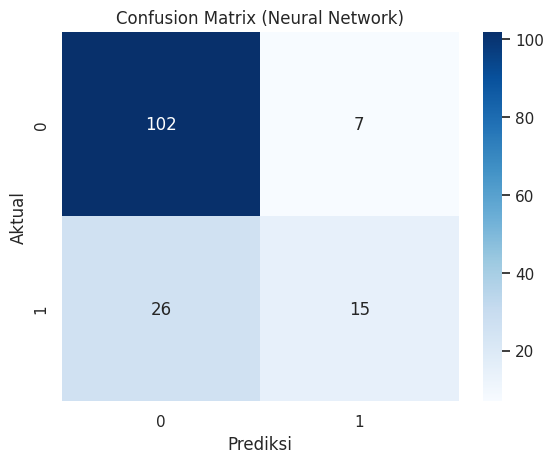

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Neural Network)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Proses membuat model dengan K-Nearest Neighbors

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  #Jumlah tetangga (k), dapat disesuaikan
knn.fit(X_train, y_train)

KNeighborsClassifier()

from sklearn.neighbors import
KNeighborsClassifier: Mengimpor kelas KNeighborsClassifier dari library sklearn.neighbors. Kelas ini digunakan untuk membuat model KNN.

knn = KNeighborsClassifier(n_neighbors=5): Membuat objek knn dari kelas KNeighborsClassifier dengan parameter n_neighbors=5. Parameter ini menentukan jumlah tetangga terdekat (k) yang akan dipertimbangkan dalam proses klasifikasi.Nilai k menyesuaikan sesuai kebutuhan.

knn.fit(X_train, y_train): Melatih model KNN menggunakan data pelatihan X_train (fitur) dan y_train (target). Proses ini akan mempelajari pola dari data pelatihan untuk digunakan dalam prediksi.

In [104]:
# Membuat prediksi
y_pred = knn.predict(X_test)

y_pred = knn.predict(X_test): Menggunakan model KNN yang telah dilatih (knn) untuk membuat prediksi pada data uji X_test. Hasil prediksi disimpan dalam variabel y_pred.

In [105]:
# Print classification report untuk detail evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.62      0.51      0.56        41

    accuracy                           0.78       150
   macro avg       0.72      0.70      0.71       150
weighted avg       0.77      0.78      0.77       150



In [106]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.78


Output 0.78 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.78 berarti bahwa model berhasil memprediksi dengan benar sekitar 78% dari semua sampel pada data uji (y_test) yang telah digunakan.

In [107]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred)

In [108]:
# Tampilkan confusion matrix
print("\nConfusion Matrix (KNN):\n", cm_knn)


Confusion Matrix (KNN):
 [[96 13]
 [20 21]]


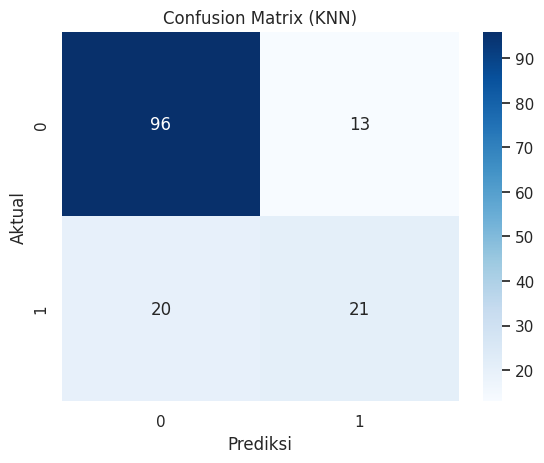

In [109]:
# Visualisasikan confusion matrix untuk KNN
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

Naïve Bayes:
1.   Akurasi: 0.7809364548494984
2.   Confusion Matrix:
     [[97 12]
     [22 19]]

KNN:
1.   Akurasi: 0.78
2.   Confusion Matrix:
     [[96 13]
     [20 21]]

Analisis Perbandingan:
Akurasi Naïve Bayes (0.7809) sedikit lebih tinggi daripada KNN (0.78). Perbedaannya sangat kecil, menunjukkan bahwa kedua model memiliki performa yang hampir sama dalam hal prediksi yang benar secara keseluruhan.
Dataset ini lebih cocok menggunakan Naive Bayes, karena Naive Bayes mendukungg fitur yang bersifat kategorik.
